**Medical Insurance Cost Prediction**

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data collection and analysis

In [10]:
df = pd.read_csv('/content/medical_insurance_cost.csv')

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
df.shape

(1338, 7)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical features - sex, smoker, region

# target column - charges

In [14]:
# missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data analysis

In [15]:
# statistical measures
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


30% - 30 % of values are lessthan 39(age)

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 600x600 with 0 Axes>

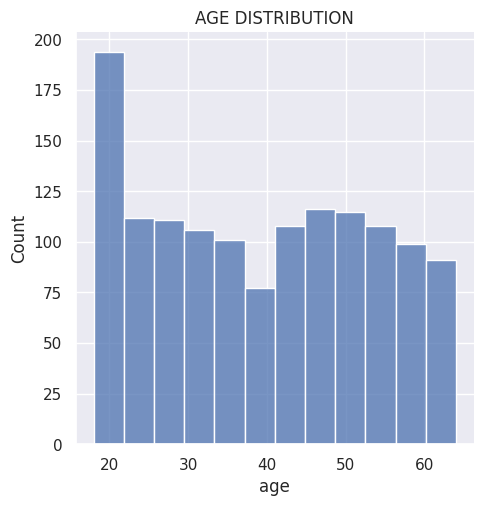

In [16]:
# distribution of age value
sns.set()
plt.figure(figsize = (6,6))
sns.displot(df['age'])
plt.title('AGE DISTRIBUTION')
plt.show

From almost 25 to 65 age have the distribution is almost normal.

People of age 20 is more in our dataset.

## use sns.set() for one time

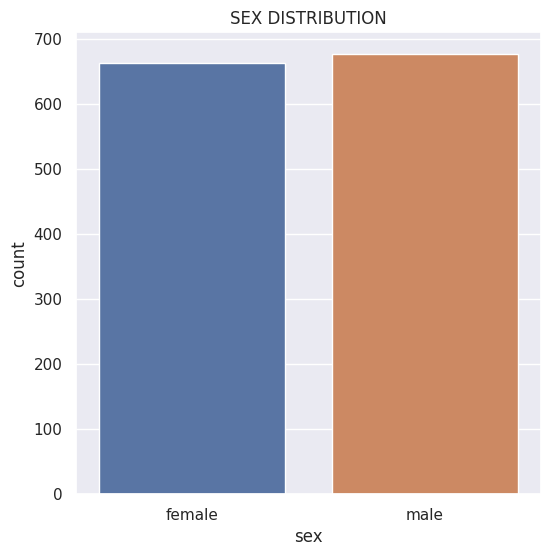

In [17]:
# plot 'sex'
# it is categorical value
# we need to use count plot
plt.figure(figsize = (6,6))
sns.countplot(x='sex',data = df)
plt.title('SEX DISTRIBUTION')
plt.show()

# the count of male and female is almost in same range.

In [18]:
# count the no. of male and female
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<Figure size 600x600 with 0 Axes>

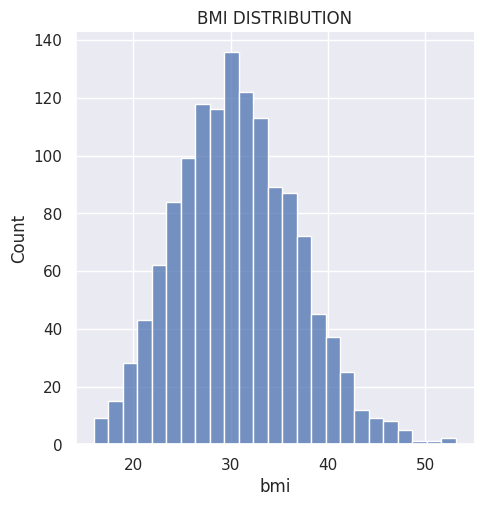

In [19]:
# bmi distribution
plt.figure(figsize = (6,6))
sns.displot(df['bmi'])
plt.title('BMI DISTRIBUTION')
plt.show()

BMI - body mass index
Normal BMI range of a person --> 18.5 to 24.9

understand a human body is under weight(<18.5), over weight(>24.9) or normal(18.5 to 24.9)

The figure is a normal distribution
more count of bmi is in range of 30
Range from 10 to 30 is increasing the bmi count and is decreasing from 30 to 50.
##Lot of people in this dataset is overweight. This affect the insurance cost a person get.



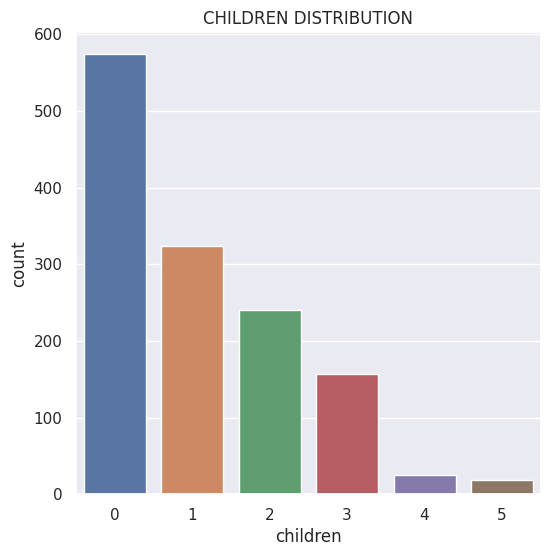

In [20]:
# no. of children - it is numerical value
# use count plot instead of distribution because it only have 5 or 6 values [0 1 2 3 4 5 6 so on]
plt.figure(figsize = (6,6))
sns.countplot(x = 'children', data = df)
plt.title('CHILDREN DISTRIBUTION')
plt.show()

no children have high count. range between 550 to 570.



In [21]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

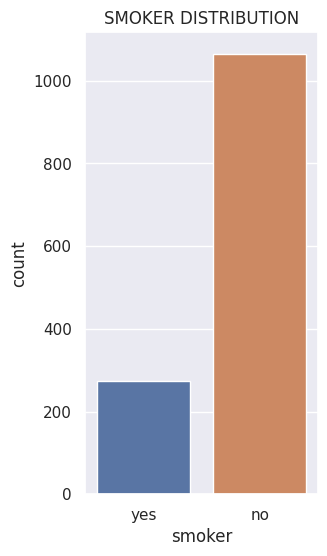

In [22]:
# smoker coulmn
# use countplot
plt.figure(figsize = (3,6))
sns.countplot(x = 'smoker', data = df)
plt.title('SMOKER DISTRIBUTION')
plt.show()

no smokers count is high, range above 1000
and the smokers range is aroung 300

In [23]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

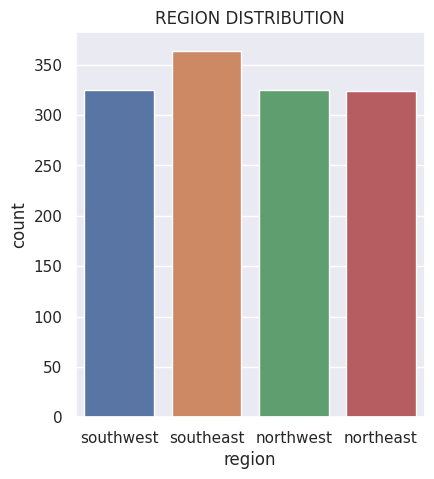

In [24]:
# region coulmn
plt.figure(figsize = (4.5,5))
sns.countplot(x = 'region', data = df)
plt.title('REGION DISTRIBUTION')
plt.show()

All the 4 region have almost similar range of distibution.

In [25]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<Figure size 300x600 with 0 Axes>

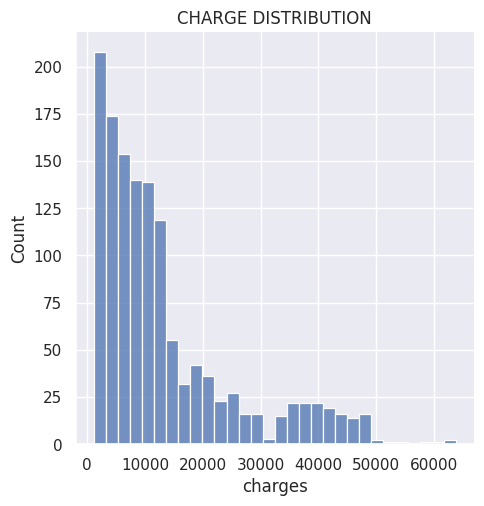

In [26]:
# charges distribution
plt.figure(figsize = (3,6))
sns.displot(df['charges'])
plt.title('CHARGE DISTRIBUTION')
plt.show()

High distibution in 10,000 dollars
and little values in 30,000 dollar, 40,000 dollar

in sex, smoker, region - there only few number of range
--> use countplot
sex - male or female
smoker - yes, no
region - southeast, southwest, northwest, northeast

But in age, bmi, charges - range of values is high --> use distribution

##Data Pre-Processing
cannot feed text values to ML
Computer can understand numerical values well.
sex: female = 1, male = 0
smoker: yes = 0 , no = 1
region:
this process in called encoding the categorical features

In [27]:
# encoding the categorical features
# encoding sex coulmn
df.replace({'sex':{'male':0, 'female':1}}, inplace = True)

In [28]:
# encoding smoker column
df.replace({'smoker':{'yes':0, 'no': 1}}, inplace = True)

In [29]:
# encoding region column
df.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace = True)

In [30]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


Split into features and target

In [31]:
x = df.drop(columns = 'charges', axis = 1)
y = df['charges']

In [32]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3


In [33]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

In [35]:
print(x.shape, x_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)


total x = 1338
20% x = 268 --> x_test
80% x = 1070 --> x_train

## Model training
Linear regression model
x axis = features
y axis = target


linear regression - is a line model
equation of line --> y = mx + c
where x - inpit features, y - prediction probability, m - slope, c - intercept [distance from the origin to the line]

In [36]:
# loading the linear regression model
regressor = LinearRegression()

In [37]:
# fit this model to x_train , y_train
regressor.fit(x_train,y_train)

LinearRegression()

Model evaluvation

In [38]:
# prediction on training data
training_data_prediction = regressor.predict(x_train)

# find the r square value
range btwn 0 to 1
if the value is close to 1, then our model is performing well
if the value is close to 0, then our model is not performing well.

in some cases --> less r square value = good.
it differ in different cases

In [39]:
r2_train = metrics.r2_score(y_train, training_data_prediction)

In [40]:
print('R square value', r2_train)

R square value 0.751505643411174


r square value = 0.7515
it is close to 1. so value is good in this particular case.

# r square for testing data
the evaluation on tsting data is important. our model didn't see this test data.

In [41]:
test_data_prediction = regressor.predict(x_test)

In [42]:
# r squared value
r2_test = metrics.r2_score(y_test, test_data_prediction)
print('R squared value:', r2_test)

R squared value: 0.7447273869684076


r squared value for test = 0.744
almost close to x_train

why we are predicting training_data and testing_data
evaluvating on testing data is important
but we do on training data. this is for **over training in ML[overfitting]** data
inthis the model will over-learned the training data which is not neccessary.
in this case we get huge value --> training data,
less value --> testing data

For good fit or good performance --> the training data and testing data should almost equal to eachother.

In our model the value is almost equal.


In [43]:
# Building predictive system
# data (only features) copied from the original csv data file - 37,female,27.74,3,no,northwest
# not that we change the categorical values to numerical value
# so we need to change the categorical values to numerical [input_data]
# input_data = (37,female,27.74,3,no,northwest) --> (37,1,27.74,3,1,3)
# using these values we should predict the insurance cost

input_data = (37,1,27.74,3,1,3)
# changing tuple to numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the array
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)
# reshape(1,-1) --> we only taking one row not the whole dataset
# because the training dataset have 1070 values. so we are not using reshape(1,-1) it will take the 1070 datasets

prediction = regressor.predict(input_data_reshape)
print(prediction)


[8307.29448212]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


We got the insurance cost prediction as 8307.29448212 dollars. in por original datasets the amount is 7281.5056 dollar.
which is closer values. It performs that our model perform well
[8307.29448212] is in form of list.

In [45]:
print('The insurance cost is USD ', prediction[0])

The insurance cost is USD  8307.294482119469
